# Singapore Resale Flat Prices Predicting


In [1]:
#import necessary libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import statsmodels.api as sm
from wordcloud import WordCloud
import plotly.express as px
import joblib
import matplotlib.patches as mpatches
import plotly.graph_objects as go
import calendar
import streamlit as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from math import sqrt


## Data Preprocessing and cleaning

### Reading all the datasets for a basic understanding

In [3]:
# Read the csv file into dataframe
df1 = pd.read_csv("Singapore_resale_flat_prices_01.csv")

# Print the basic information and first few rows of the dataframe
print(df1.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB
None
     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04

In [4]:
# Read the csv file into dataframe
df2 = pd.read_csv("Singapore_resale_flat_prices_02.csv")

# Print the basic information and first few rows of the dataframe
print(df2.info())
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB
None
     month        town flat_type block       street_name storey_range  \
0  2000-01  ANG MO KIO    3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1  2000-01  ANG MO KIO    3 ROOM   174  ANG MO KIO AVE 4     04

In [5]:
# Read the csv file into dataframe
df3 = pd.read_csv("Singapore_resale_flat_prices_03.csv")

# Print the basic information and first few rows of the dataframe
print(df3.info())
print(df3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB
None
     month        town flat_type block        street_name storey_range  \
0  2012-03  ANG MO KIO    2 ROOM   172   ANG MO KIO AVE 4     06 TO 10   
1  2012-03  ANG MO KIO    2 ROOM   510   ANG MO KIO AVE 8     01 TO 05   
2 

In [6]:
# Read the csv file into dataframe
df4 = pd.read_csv("Singapore_resale_flat_prices_04.csv")

# Print the basic information and first few rows of the dataframe
print(df4.info())
print(df4.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB
None
     month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    

In [7]:
# Read the csv file into dataframe
df5 = pd.read_csv("Singapore_resale_flat_prices_05.csv")

# Print the basic information and first few rows of the dataframe
print(df5.info())
print(df5.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167169 entries, 0 to 167168
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                167169 non-null  object 
 1   town                 167169 non-null  object 
 2   flat_type            167169 non-null  object 
 3   block                167169 non-null  object 
 4   street_name          167169 non-null  object 
 5   storey_range         167169 non-null  object 
 6   floor_area_sqm       167169 non-null  float64
 7   flat_model           167169 non-null  object 
 8   lease_commence_date  167169 non-null  int64  
 9   remaining_lease      167169 non-null  object 
 10  resale_price         167169 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 14.0+ MB
None
     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01

### Splitting the numerical part of the remaining lease from DF5

In [8]:
# Extract the numeric part of 'remaining_lease', split by space, and convert to integer
df5['remaining_lease'] = df5['remaining_lease'].str.split(' ').str[0].astype('int64')

# Display the updated 'remaining_lease' column
print(df5['remaining_lease'])

# Print the basic information and first few rows of the dataframe
print(df5.info())
print(df5.head())

0         61
1         60
2         62
3         62
4         62
          ..
167164    63
167165    63
167166    63
167167    63
167168    63
Name: remaining_lease, Length: 167169, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167169 entries, 0 to 167168
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                167169 non-null  object 
 1   town                 167169 non-null  object 
 2   flat_type            167169 non-null  object 
 3   block                167169 non-null  object 
 4   street_name          167169 non-null  object 
 5   storey_range         167169 non-null  object 
 6   floor_area_sqm       167169 non-null  float64
 7   flat_model           167169 non-null  object 
 8   lease_commence_date  167169 non-null  int64  
 9   remaining_lease      167169 non-null  int64  
 10  resale_price         167169 non-null  float64
dtypes: float64(2), int64(2), o

### Merging all the datasets

In [9]:
# Merging datasets df1, df2, df3, df4 and df5
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Print the basic information and first few rows of the merged dataframe
print(df_combined.info())
print(df_combined.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913372 entries, 0 to 913371
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                913372 non-null  object 
 1   town                 913372 non-null  object 
 2   flat_type            913372 non-null  object 
 3   block                913372 non-null  object 
 4   street_name          913372 non-null  object 
 5   storey_range         913372 non-null  object 
 6   floor_area_sqm       913372 non-null  float64
 7   flat_model           913372 non-null  object 
 8   lease_commence_date  913372 non-null  int64  
 9   resale_price         913372 non-null  float64
 10  remaining_lease      204322 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 76.7+ MB
None
     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  

### Splitting the month column to month and year

In [10]:
# Split 'month' into 'year' and 'month' columns
df_combined[['year', 'month']] = df_combined['month'].str.split('-', expand=True)

# Convert 'year' and 'month' columns to numeric types if needed
df_combined['year'] = pd.to_numeric(df_combined['year'])
df_combined['month'] = pd.to_numeric(df_combined['month'])

# Display the basic information and the updated DataFrame
print(df_combined.info())
print(df_combined.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913372 entries, 0 to 913371
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                913372 non-null  int64  
 1   town                 913372 non-null  object 
 2   flat_type            913372 non-null  object 
 3   block                913372 non-null  object 
 4   street_name          913372 non-null  object 
 5   storey_range         913372 non-null  object 
 6   floor_area_sqm       913372 non-null  float64
 7   flat_model           913372 non-null  object 
 8   lease_commence_date  913372 non-null  int64  
 9   resale_price         913372 non-null  float64
 10  remaining_lease      204322 non-null  float64
 11  year                 913372 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 83.6+ MB
None
   month        town flat_type block       street_name storey_range  \
0      1  ANG MO KIO    1 ROOM   309

### Calculating the remaining lease for the Nan values

In [11]:
# Calculate remaining lease for rows with NaN values
df_combined['remaining_lease'].fillna(99 - (df_combined['year'] - df_combined['lease_commence_date']), inplace=True)

# Verify the results
print(df_combined[['lease_commence_date', 'year', 'remaining_lease']])

        lease_commence_date  year  remaining_lease
0                      1977  1990             86.0
1                      1977  1990             86.0
2                      1977  1990             86.0
3                      1977  1990             86.0
4                      1976  1990             85.0
...                     ...   ...              ...
913367                 1987  2023             63.0
913368                 1987  2023             63.0
913369                 1988  2023             63.0
913370                 1987  2023             63.0
913371                 1987  2023             63.0

[913372 rows x 3 columns]


### Checking for repetitions in categorical columns

In [12]:
# Printing unique values of the categorical columns to check for repetitions 
print(df_combined['town'].unique())
print(df_combined['flat_type'].unique())
print(df_combined['block'].unique())
print(df_combined['street_name'].unique())
print(df_combined['storey_range'].unique())
print(df_combined['flat_model'].unique())

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'LIM CHU KANG' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']
['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION' 'MULTI-GENERATION']
['309' '216' '211' ... '462C' '462B' '462D']
['ANG MO KIO AVE 1' 'ANG MO KIO AVE 3' 'ANG MO KIO AVE 4'
 'ANG MO KIO AVE 10' 'ANG MO KIO AVE 5' 'ANG MO KIO AVE 8'
 'ANG MO KIO AVE 6' 'ANG MO KIO AVE 9' 'ANG MO KIO AVE 2'
 'BEDOK RESERVOIR RD' 'BEDOK NTH ST 3' 'BEDOK STH RD' 'NEW UPP CHANGI RD'
 'BEDOK NTH RD' 'BEDOK STH AVE 1' 'CHAI CHEE RD' 'CHAI CHEE DR'
 'BEDOK NTH AVE 4' 'BEDOK STH AVE 3' 'BEDOK STH AVE 2' 'BEDOK NTH ST 2'
 'BEDOK NTH ST 4' 'BEDOK NTH AVE 2' 'BEDOK NTH AVE 3' 'BEDOK NTH AVE 1'
 'BEDOK NTH ST 1' 'CHAI CHEE ST' 'SIN MING RD' 'SHUNF

### Standardizing the columns flat_model and flat_type to make them consistent

In [13]:
# Changing the case to uppercase for consistency
df_combined['flat_model'] = df_combined['flat_model'].str.upper()

# Printing the unique values
print(df_combined['flat_model'].unique())

['IMPROVED' 'NEW GENERATION' 'MODEL A' 'STANDARD' 'SIMPLIFIED'
 'MODEL A-MAISONETTE' 'APARTMENT' 'MAISONETTE' 'TERRACE' '2-ROOM'
 'IMPROVED-MAISONETTE' 'MULTI GENERATION' 'PREMIUM APARTMENT'
 'ADJOINED FLAT' 'PREMIUM MAISONETTE' 'MODEL A2' 'DBSS' 'TYPE S1'
 'TYPE S2' 'PREMIUM APARTMENT LOFT' '3GEN']


In [14]:
# Convert 'flat_type' values to lowercase
df_combined['flat_type'] = df_combined['flat_type'].str.lower()

# Standardize values to a common set of categories
type_mapping = {
    '1 room': '1 room',
    '3 room': '3 room',
    '4 room': '4 room',
    '5 room': '5 room',
    '2 room': '2 room',
    'executive': 'executive',
    'multi generation': 'multi generation',
    'multi-generation': 'multi generation'
}

df_combined['flat_type'] = df_combined['flat_type'].map(type_mapping)

# Changing the case to Uppercase
df_combined['flat_type'] = df_combined['flat_type'].str.upper()

# Display the unique values
print(df_combined['flat_type'].unique())


['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION']


### Removing the outliers in the columns 'remaining_lease' and 'storey_range'

In [15]:
# Checking for number of rows with remaining lease period more than 99
print((df_combined['remaining_lease']>99).sum())

# Create a boolean mask to identify rows containing any of the specified values
mask = df_combined['remaining_lease']>99

# Use the boolean mask to drop rows
df_combined = df_combined[~mask]

# Display the DataFrame after dropping rows
print(df_combined)

51
        month        town         flat_type block       street_name  \
0           1  ANG MO KIO            1 ROOM   309  ANG MO KIO AVE 1   
1           1  ANG MO KIO            1 ROOM   309  ANG MO KIO AVE 1   
2           1  ANG MO KIO            1 ROOM   309  ANG MO KIO AVE 1   
3           1  ANG MO KIO            1 ROOM   309  ANG MO KIO AVE 1   
4           1  ANG MO KIO            3 ROOM   216  ANG MO KIO AVE 1   
...       ...         ...               ...   ...               ...   
913367      5      YISHUN         EXECUTIVE   827      YISHUN ST 81   
913368      5      YISHUN         EXECUTIVE   824      YISHUN ST 81   
913369      7      YISHUN         EXECUTIVE   837      YISHUN ST 81   
913370      1      YISHUN  MULTI GENERATION   666      YISHUN AVE 4   
913371      6      YISHUN  MULTI GENERATION   633      YISHUN ST 61   

       storey_range  floor_area_sqm        flat_model  lease_commence_date  \
0          10 TO 12            31.0          IMPROVED             

In [16]:
# Drop rows where the 'storey_range' column contains specific values
values_to_drop = ['01 TO 05', '06 TO 10', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '31 TO 35', '36 TO 40']

# Create a boolean mask to identify rows containing any of the specified values
mask = df_combined['storey_range'].isin(values_to_drop)

# Use the boolean mask to drop rows
df_combined = df_combined[~mask]

# Display the DataFrame after dropping rows
print(df_combined)

        month        town         flat_type block       street_name  \
0           1  ANG MO KIO            1 ROOM   309  ANG MO KIO AVE 1   
1           1  ANG MO KIO            1 ROOM   309  ANG MO KIO AVE 1   
2           1  ANG MO KIO            1 ROOM   309  ANG MO KIO AVE 1   
3           1  ANG MO KIO            1 ROOM   309  ANG MO KIO AVE 1   
4           1  ANG MO KIO            3 ROOM   216  ANG MO KIO AVE 1   
...       ...         ...               ...   ...               ...   
913367      5      YISHUN         EXECUTIVE   827      YISHUN ST 81   
913368      5      YISHUN         EXECUTIVE   824      YISHUN ST 81   
913369      7      YISHUN         EXECUTIVE   837      YISHUN ST 81   
913370      1      YISHUN  MULTI GENERATION   666      YISHUN AVE 4   
913371      6      YISHUN  MULTI GENERATION   633      YISHUN ST 61   

       storey_range  floor_area_sqm        flat_model  lease_commence_date  \
0          10 TO 12            31.0          IMPROVED                

### Splitting the Storey range to lower bound and upper bound

In [17]:
# Split the 'storey_range' into lower and upper bounds
df_combined[['lower_bound', 'upper_bound']] = df_combined['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df_combined['lower_bound'] = pd.to_numeric(df_combined['lower_bound'])
df_combined['upper_bound'] = pd.to_numeric(df_combined['upper_bound'])

# Display the DataFrame with lower and upper bounds
print(df_combined[['storey_range', 'lower_bound', 'upper_bound']])


       storey_range  lower_bound  upper_bound
0          10 TO 12           10           12
1          04 TO 06            4            6
2          10 TO 12           10           12
3          07 TO 09            7            9
4          04 TO 06            4            6
...             ...          ...          ...
913367     01 TO 03            1            3
913368     07 TO 09            7            9
913369     01 TO 03            1            3
913370     07 TO 09            7            9
913371     04 TO 06            4            6

[906483 rows x 3 columns]


### Adding new columns 

In [18]:
# Adding a new column 'price_per_sqm'
df_combined['price_per_sqm'] = df_combined['resale_price'] / df_combined['floor_area_sqm']

# Adding a new column 'years_holding'
df_combined['years_holding'] = df_combined['year'] - df_combined['lease_commence_date']

# Adding a new column 'current_remaining_lease'
df_combined['current_remaining_lease'] = df_combined['remaining_lease'] - (2024 - df_combined['year'])

# Display the DataFrame with the new column
print(df_combined[['resale_price', 'floor_area_sqm', 'price_per_sqm']])
print(df_combined[['year', 'lease_commence_date', 'remaining_lease', 'years_holding', 'current_remaining_lease']])

        resale_price  floor_area_sqm  price_per_sqm
0             9000.0            31.0     290.322581
1             6000.0            31.0     193.548387
2             8000.0            31.0     258.064516
3             6000.0            31.0     193.548387
4            47200.0            73.0     646.575342
...              ...             ...            ...
913367      829000.0           154.0    5383.116883
913368      855000.0           146.0    5856.164384
913369      860000.0           146.0    5890.410959
913370     1080000.0           179.0    6033.519553
913371      935000.0           159.0    5880.503145

[906483 rows x 3 columns]
        year  lease_commence_date  remaining_lease  years_holding  \
0       1990                 1977             86.0             13   
1       1990                 1977             86.0             13   
2       1990                 1977             86.0             13   
3       1990                 1977             86.0             13   
4   

In [19]:
# Saving the clean dataset to a file
df_combined = df_combined.reset_index(drop=True)
df_combined.to_csv('Singapore_resale_flat_prices_updated.csv', index=False)


## Exploratory Data Analysis

### Displaying basic statistics of the columns

In [20]:
# Reading the dataset
df = pd.read_csv('Singapore_resale_flat_prices_updated.csv')

# Display basic information about the dataset
print(df.info())

# Display summary statistics of numerical columns
print(df.describe())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906483 entries, 0 to 906482
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    906483 non-null  int64  
 1   town                     906483 non-null  object 
 2   flat_type                906483 non-null  object 
 3   block                    906483 non-null  object 
 4   street_name              906483 non-null  object 
 5   storey_range             906483 non-null  object 
 6   floor_area_sqm           906483 non-null  float64
 7   flat_model               906483 non-null  object 
 8   lease_commence_date      906483 non-null  int64  
 9   resale_price             906483 non-null  float64
 10  remaining_lease          906483 non-null  float64
 11  year                     906483 non-null  int64  
 12  lower_bound              906483 non-null  int64  
 13  upper_bound              906483 non-null  int64  
 14  pric

### Univariate Analysis

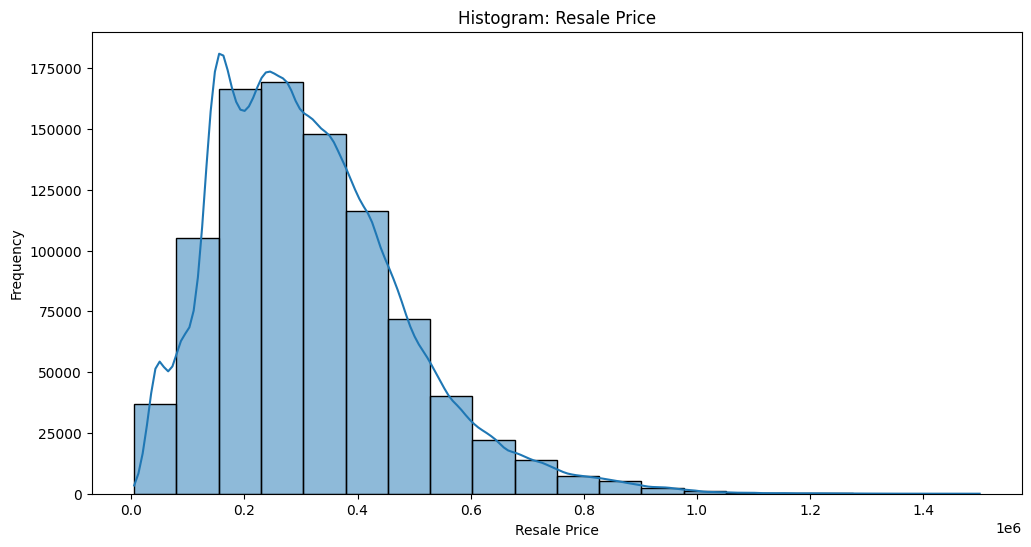

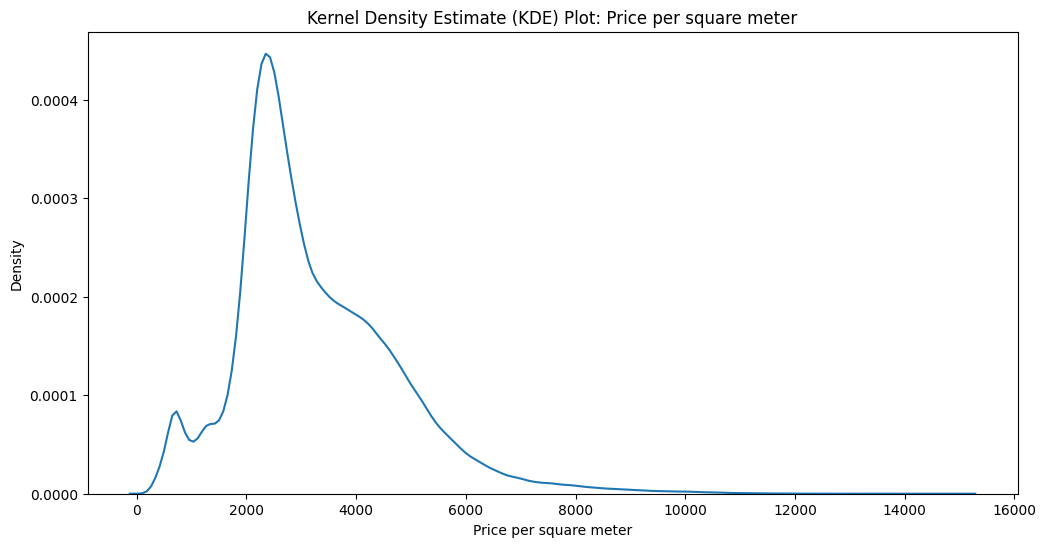

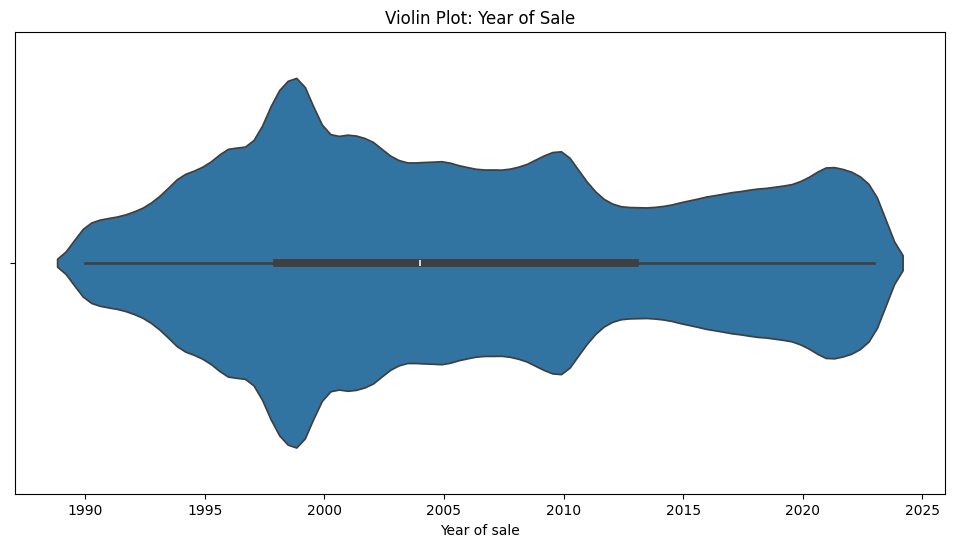

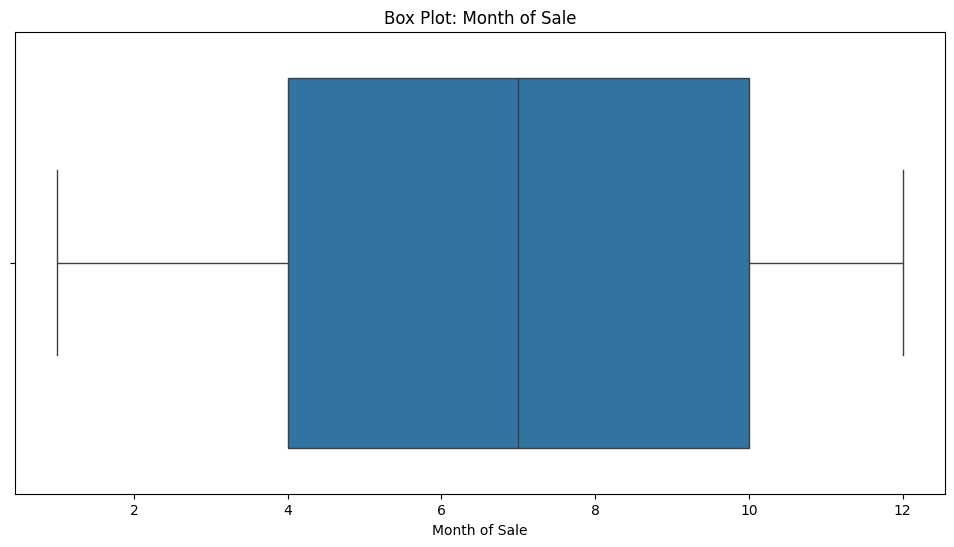

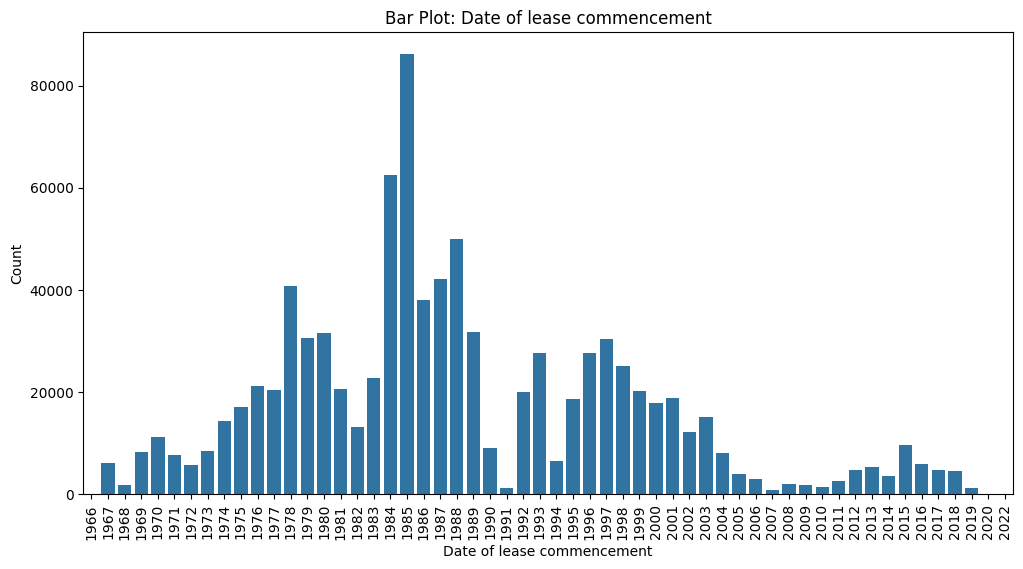

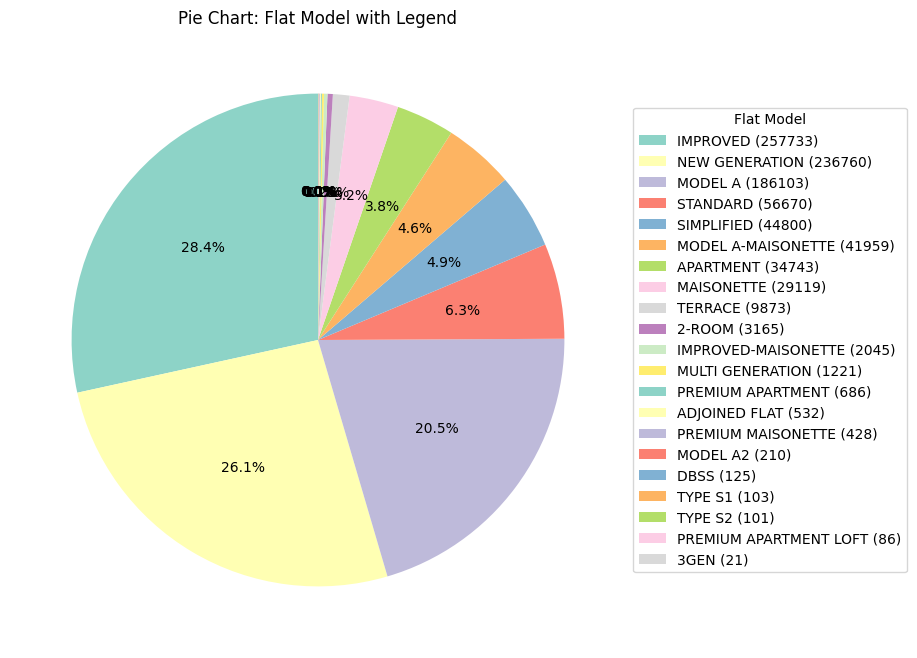

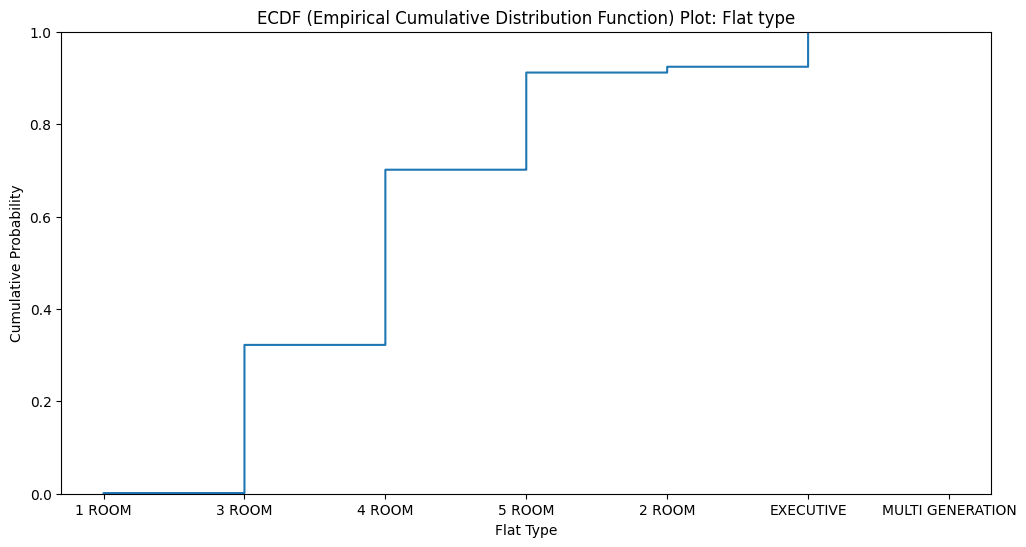

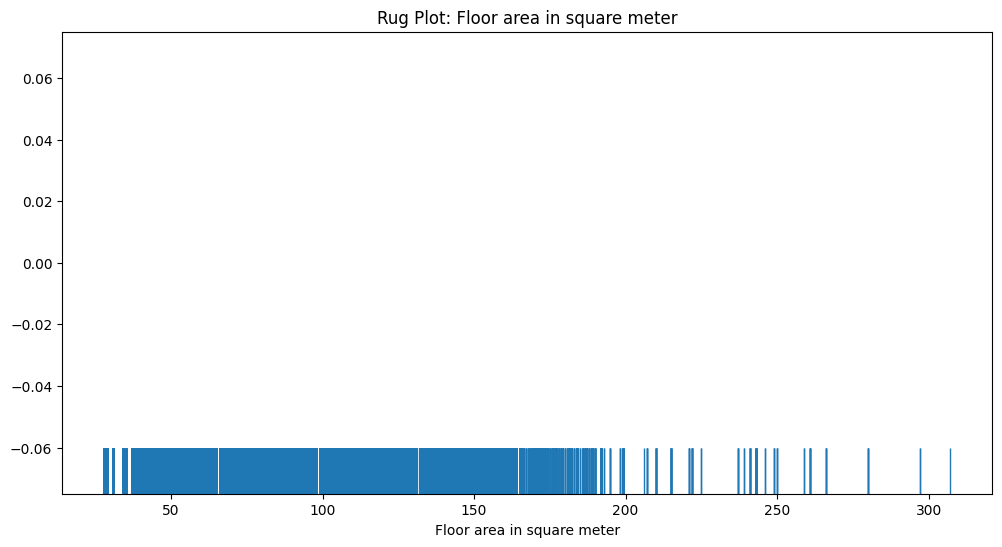

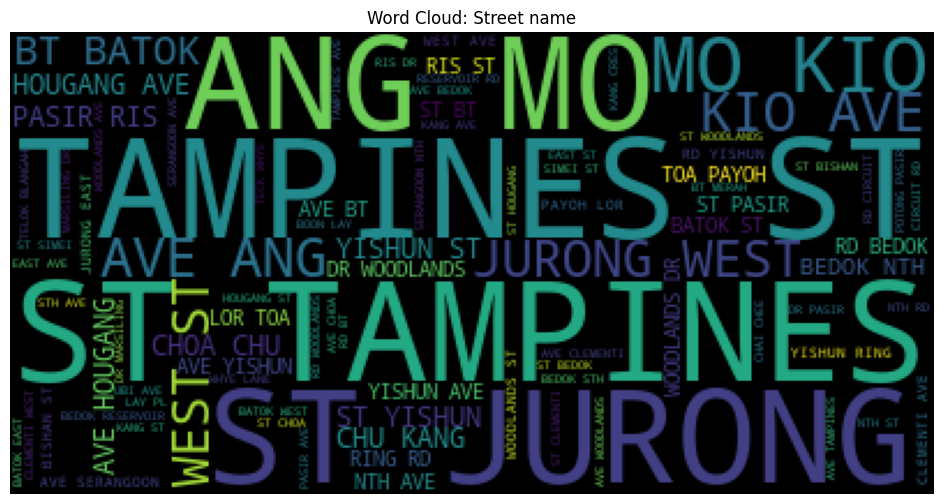

In [21]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['resale_price'], bins=20, kde=True)
plt.title('Histogram: Resale Price')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

# KDE Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(df['price_per_sqm'])
plt.title('Kernel Density Estimate (KDE) Plot: Price per square meter')
plt.xlabel('Price per square meter')
plt.ylabel('Density')
plt.show()

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['year'])
plt.title('Violin Plot: Year of Sale')
plt.xlabel('Year of sale')
plt.show()

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['month'])
plt.title('Box Plot: Month of Sale')
plt.xlabel('Month of Sale')
plt.show()

# Bar Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='lease_commence_date', data=df)
plt.title('Bar Plot: Date of lease commencement')
plt.xlabel('Date of lease commencement')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# Pie Chart with Legend for Improved Label Display
plt.figure(figsize=(8, 8))
label_counts = df['flat_model'].value_counts()
unique_labels = df['flat_model'].unique()

plt.pie(label_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(unique_labels)))
legend_labels = [f"{label} ({count})" for label, count in zip(unique_labels, label_counts)]
plt.legend(legend_labels, title='Flat Model', bbox_to_anchor=(1, 0.5), loc="center left")

plt.title('Pie Chart: Flat Model with Legend')
plt.show()


# ECDF Plot
plt.figure(figsize=(12, 6))
sns.ecdfplot(df['flat_type'])
plt.title('ECDF (Empirical Cumulative Distribution Function) Plot: Flat type')
plt.xlabel('Flat Type')
plt.ylabel('Cumulative Probability')
plt.show()

# Rug Plot
plt.figure(figsize=(12, 6))
sns.rugplot(df['floor_area_sqm'], height=0.1)
plt.title('Rug Plot: Floor area in square meter')
plt.xlabel('Floor area in square meter')
plt.show()

# Word Cloud (for text-based columns)
wordcloud = WordCloud().generate(' '.join(df['street_name']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud: Street name')
plt.show()


### Bivariate Analysis

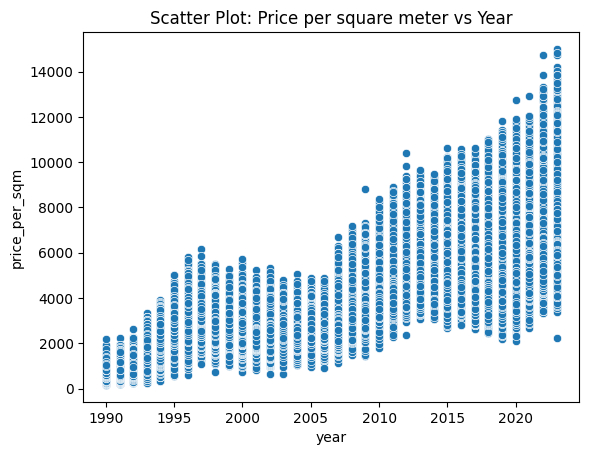

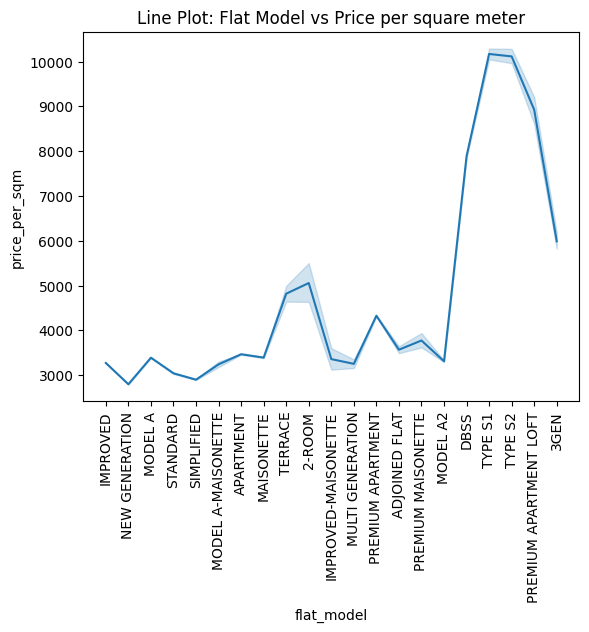

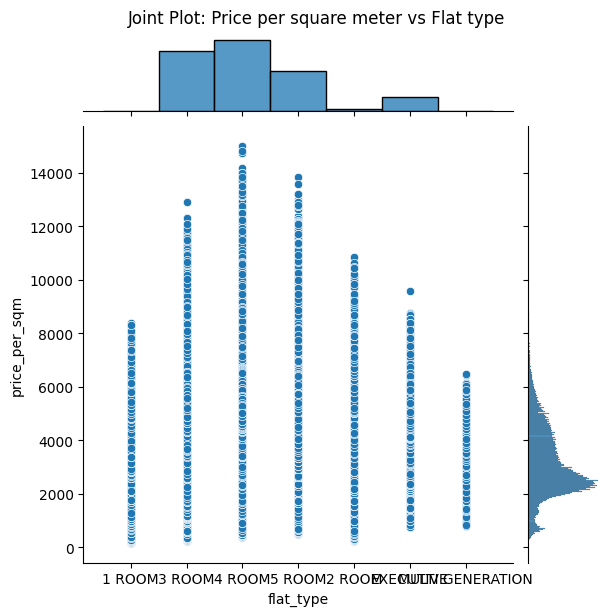

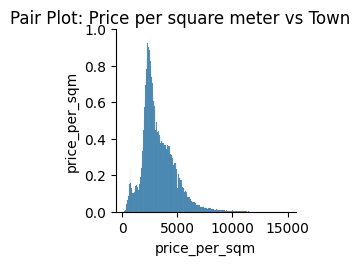

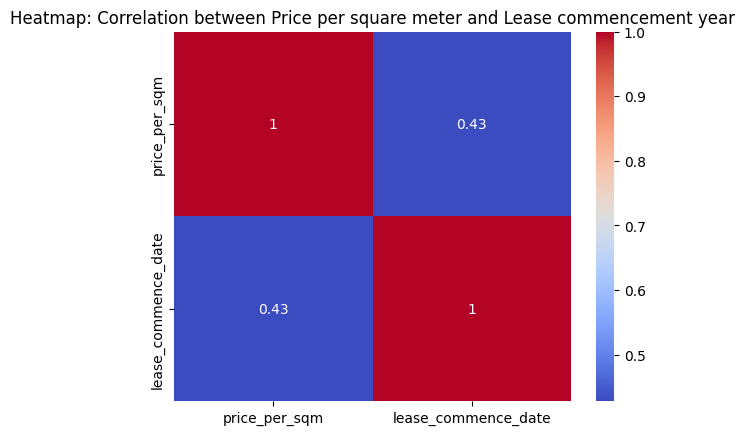

C:\Users\jones\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


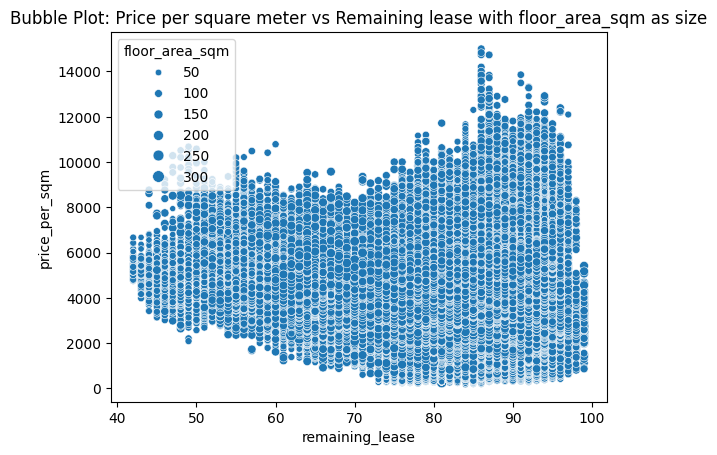

In [22]:
# Scatter Plot
sns.scatterplot(x='year', y='price_per_sqm', data=df)
plt.title('Scatter Plot: Price per square meter vs Year')
plt.show()

# Line plot
sns.lineplot(x='flat_model', y='price_per_sqm', data=df)
plt.title('Line Plot: Flat Model vs Price per square meter')
plt.xticks(rotation=90)
plt.show()

# Joint plot
sns.jointplot(x='flat_type', y='price_per_sqm', data=df)
plt.suptitle('Joint Plot: Price per square meter vs Flat type', y=1.02)
plt.show()

# Pair plot
sns.pairplot(df[['price_per_sqm', 'town']])
plt.suptitle('Pair Plot: Price per square meter vs Town', y=1.02)
plt.show()

# Heatmap
sns.heatmap(df[['price_per_sqm', 'lease_commence_date']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation between Price per square meter and Lease commencement year')
plt.show()

# Bubble plot
sns.scatterplot(x='remaining_lease', y='price_per_sqm', size='floor_area_sqm', data=df)
plt.title('Bubble Plot: Price per square meter vs Remaining lease with floor_area_sqm as size')
plt.show()


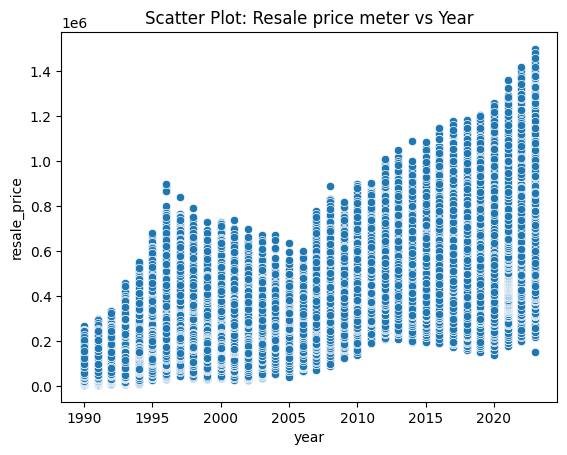

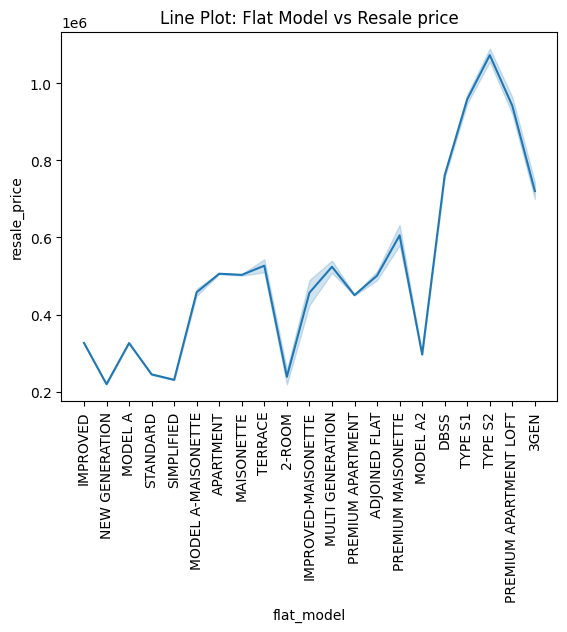

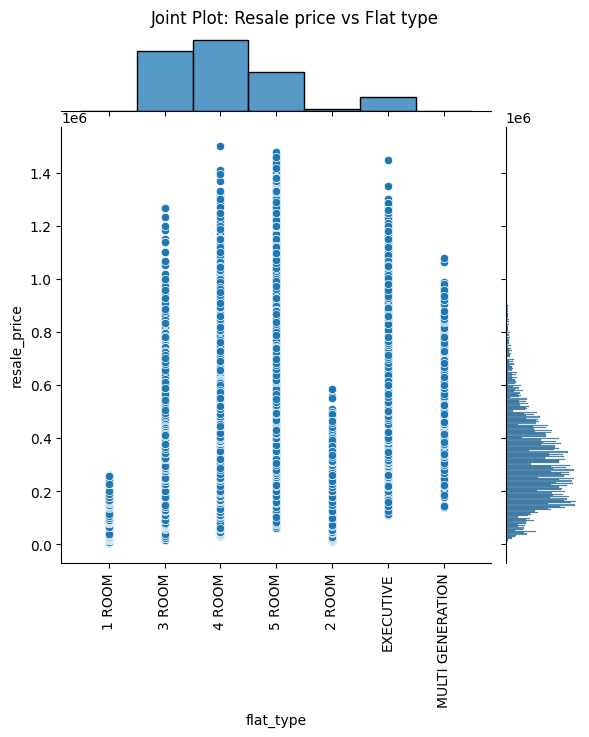

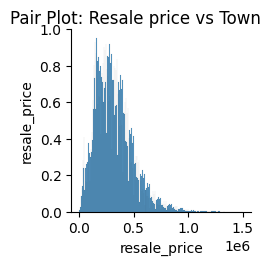

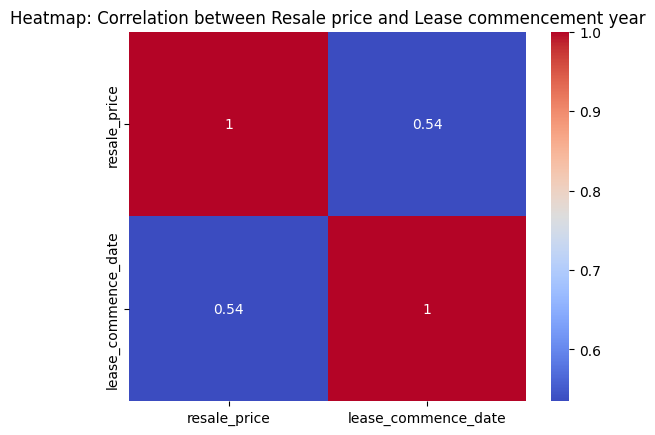

C:\Users\jones\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


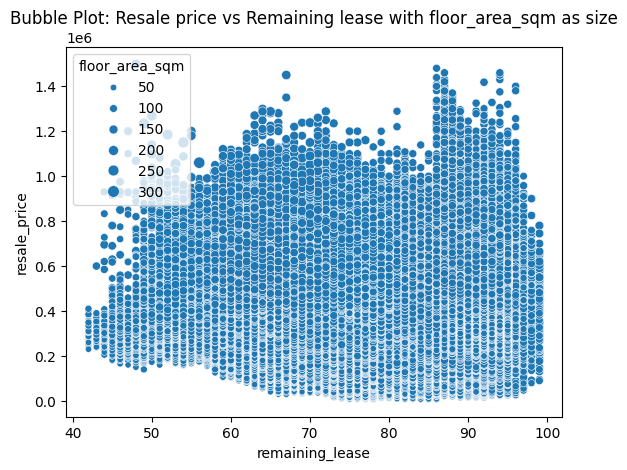

In [23]:
# Scatter Plot
sns.scatterplot(x='year', y='resale_price', data=df)
plt.title('Scatter Plot: Resale price meter vs Year')
plt.show()

# Line plot
sns.lineplot(x='flat_model', y='resale_price', data=df)
plt.title('Line Plot: Flat Model vs Resale price')
plt.xticks(rotation=90)
plt.show()

# Joint plot
sns.jointplot(x='flat_type', y='resale_price', data=df)
plt.suptitle('Joint Plot: Resale price vs Flat type', y=1.02)
plt.xticks(rotation=90)
plt.show()

# Pair plot
sns.pairplot(df[['resale_price', 'town']])
plt.suptitle('Pair Plot: Resale price vs Town', y=1.02)
plt.show()

# Heatmap
sns.heatmap(df[['resale_price', 'lease_commence_date']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation between Resale price and Lease commencement year')
plt.show()

# Bubble plot
sns.scatterplot(x='remaining_lease', y='resale_price', size='floor_area_sqm', data=df)
plt.title('Bubble Plot: Resale price vs Remaining lease with floor_area_sqm as size')
plt.show()


### Detect aberrant or missing values

In [24]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Detect outliers using Z-score
z_scores = zscore(df[['resale_price', 'floor_area_sqm']])
outliers = (abs(z_scores) > 3).all(axis=1)
print("Number of outliers:", outliers.sum())


Missing Values:
month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease            0
year                       0
lower_bound                0
upper_bound                0
price_per_sqm              0
years_holding              0
current_remaining_lease    0
dtype: int64
Number of outliers: 208


### Multivariate analysis

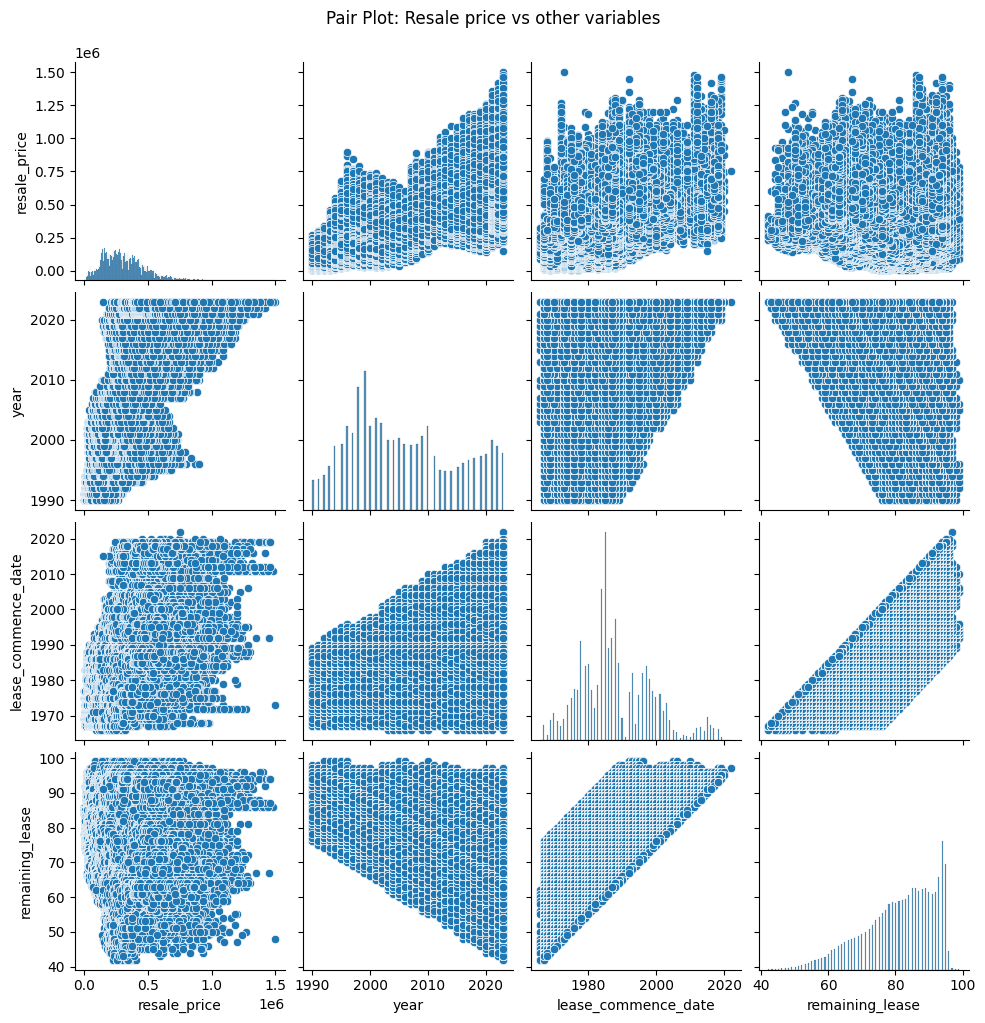

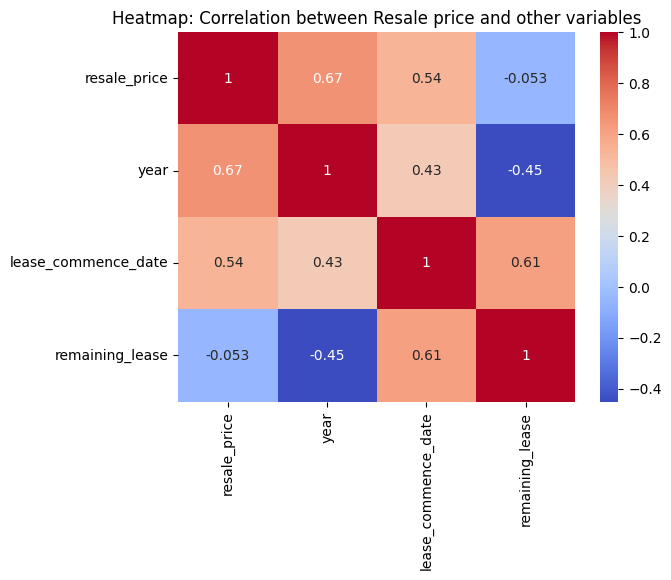

In [26]:
# Pair plot
sns.pairplot(df[['resale_price', 'year', 'lease_commence_date', 'remaining_lease']])
plt.suptitle('Pair Plot: Resale price vs other variables', y=1.02)
plt.show()

# Heatmap
sns.heatmap(df[['resale_price', 'year', 'lease_commence_date', 'remaining_lease']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation between Resale price and other variables')
plt.show()

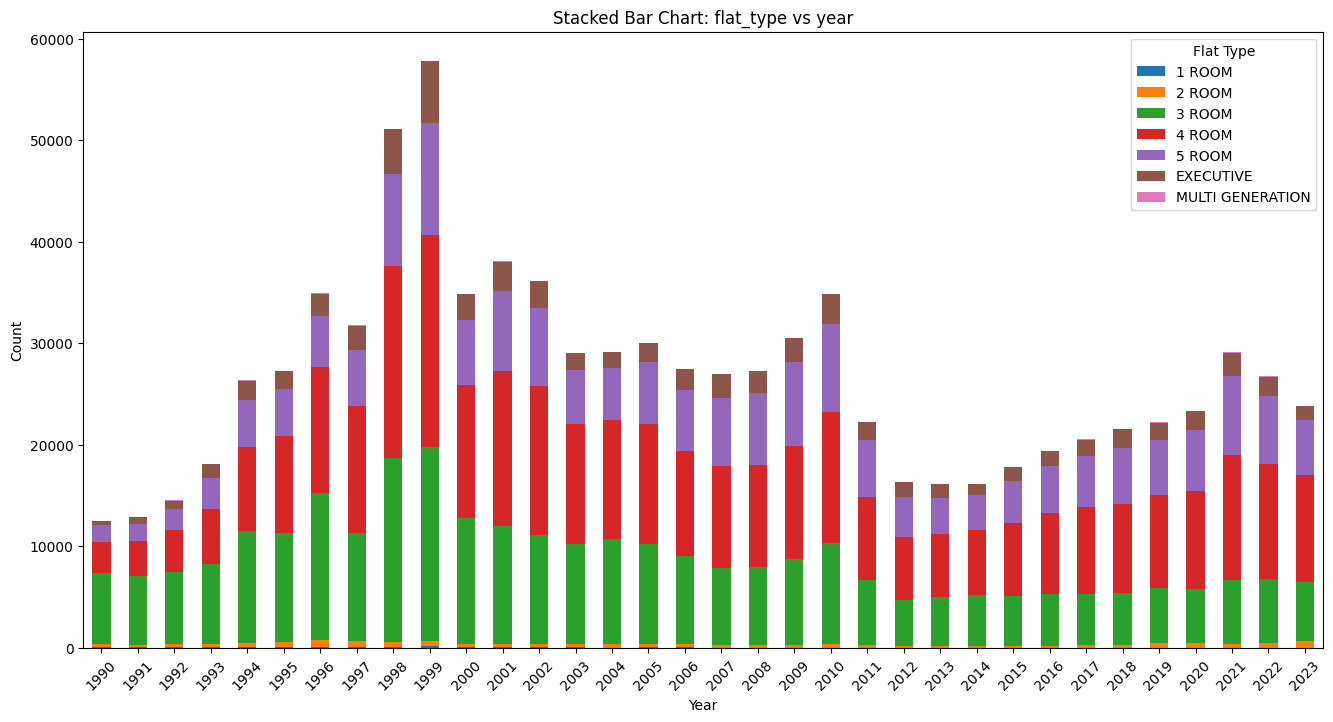

In [28]:
# Stacked Bar Chart for flat_type vs year
plt.figure(figsize=(16, 8))

df_year = df.groupby(['year', 'flat_type']).size().unstack()
df_year.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Stacked Bar Chart: flat_type vs year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Flat Type')
plt.xticks(rotation=45)
plt.show()

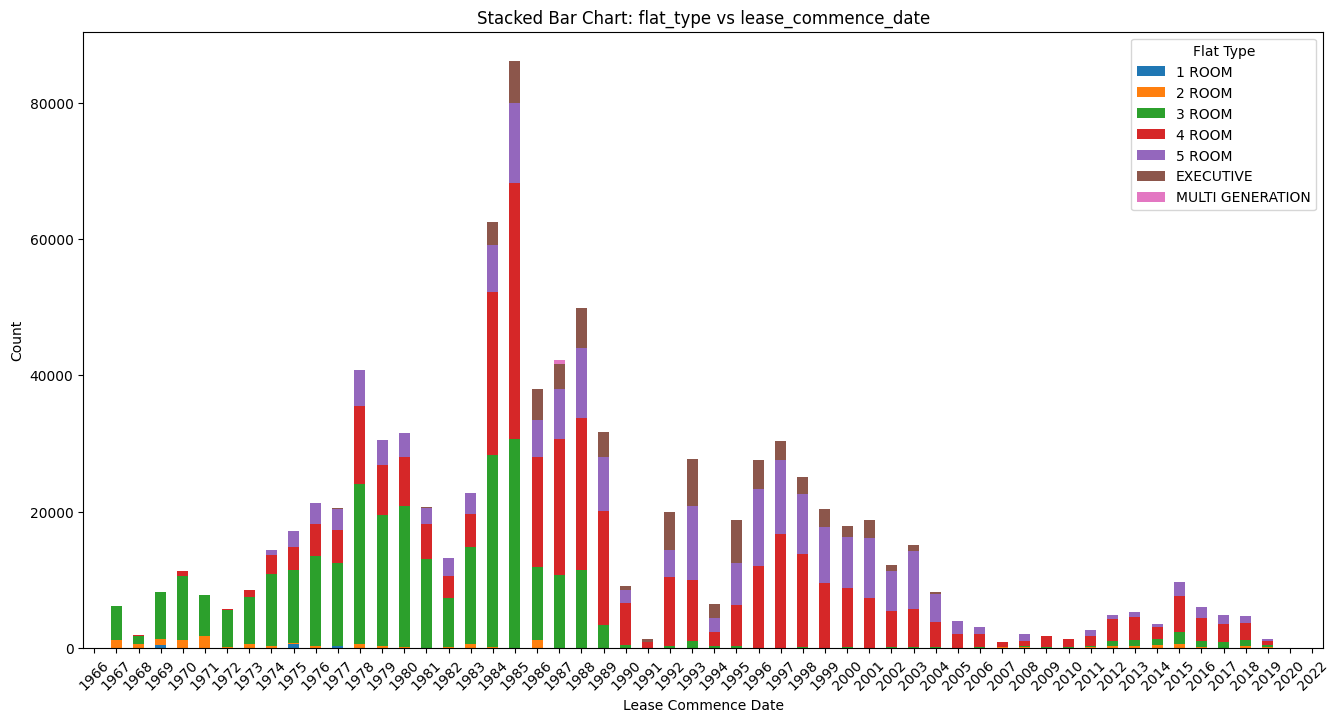

In [30]:
# Stacked Bar Chart for flat_type vs lease_commence_date
plt.figure(figsize=(16, 8))

df_lease_commence_date = df.groupby(['lease_commence_date', 'flat_type']).size().unstack()
df_lease_commence_date.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Stacked Bar Chart: flat_type vs lease_commence_date')
plt.xlabel('Lease Commence Date')
plt.ylabel('Count')
plt.legend(title='Flat Type')
plt.xticks(rotation=45)
plt.show()

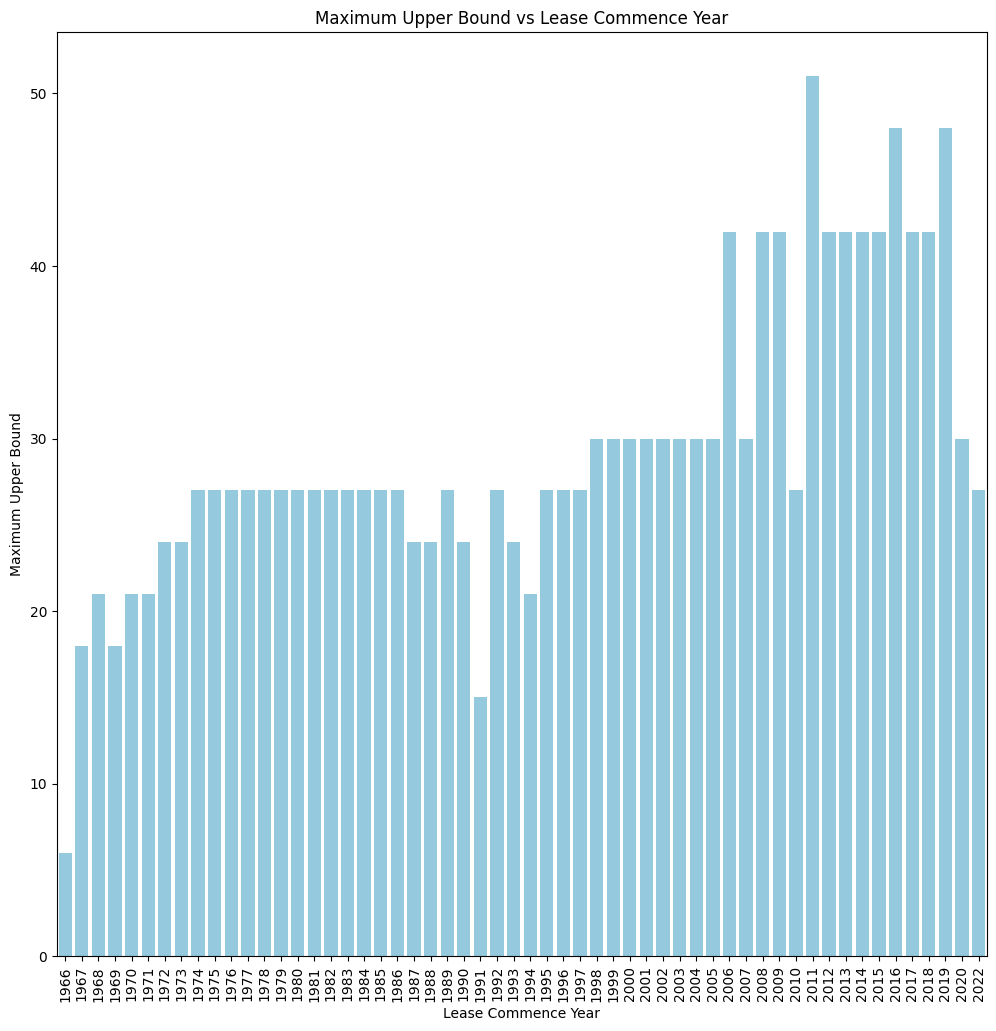

In [31]:
plt.figure(figsize=(12, 12))

# Group by lease_commence_year and find the maximum value of upper_bound for each group
max_upper_bound = df.groupby('lease_commence_date')['upper_bound'].max().reset_index()

# Create a bar plot using seaborn
sns.barplot(x='lease_commence_date', y='upper_bound', data=max_upper_bound, color='skyblue')

# Set plot labels and title
plt.title('Maximum Upper Bound vs Lease Commence Year')
plt.xlabel('Lease Commence Year')
plt.ylabel('Maximum Upper Bound')
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [35]:
!pip install -- nbformat

## Model Building and evaluation

### Linear Regression

In [38]:
# Drop irrelevant columns
selected_columns = ['year', 'town', 'flat_type', 'flat_model', 'storey_range', 
                    'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 
                    'current_remaining_lease', 'years_holding', 'resale_price']
dftrain = df[selected_columns]

# Separate features (X) and target variable (y)
X = dftrain.drop('resale_price', axis=1)
y = dftrain['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the regression model
model = LinearRegression()

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# save the model
model_filename = 'resale_price_prediction_linear.joblib'
joblib.dump(pipeline, model_filename)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)


# Print or use the metrics as needed
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Explained Variance Score: {explained_variance}")

Mean Absolute Error (MAE): 51686.062861019425
Mean Squared Error (MSE): 4570035444.699226
Root Mean Squared Error (RMSE): 67602.037282165
R-squared (R2) Score: 0.8357393794375989
Explained Variance Score: 0.8357402572660932


### Decision trees

In [39]:
# Drop irrelevant columns
selected_columns = ['year', 'town', 'flat_type', 'flat_model', 'storey_range', 
                    'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 
                    'current_remaining_lease', 'years_holding', 'resale_price']
dftrain = df[selected_columns]

# Separate features (X) and target variable (y)
X = dftrain.drop('resale_price', axis=1)
y = dftrain['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the regression model
model = DecisionTreeRegressor(random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# save the model
model_filename = 'resale_price_prediction_decision_tree.joblib'
joblib.dump(pipeline, model_filename)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)


# Print or use the metrics as needed
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Explained Variance Score: {explained_variance}")

Mean Absolute Error (MAE): 20461.49961629097
Mean Squared Error (MSE): 942222388.6989765
Root Mean Squared Error (RMSE): 30695.641200323156
R-squared (R2) Score: 0.9661337343772686
Explained Variance Score: 0.9661341301293679


### K-Nearest Neighbours

In [40]:
# Drop irrelevant columns
selected_columns = ['year', 'town', 'flat_type', 'flat_model', 'storey_range', 
                    'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 
                    'current_remaining_lease', 'years_holding', 'resale_price']
dftrain = df[selected_columns]

# Separate features (X) and target variable (y)
X = dftrain.drop('resale_price', axis=1)
y = dftrain['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the regression model
model = KNeighborsRegressor()

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# save the model
model_filename = 'resale_price_prediction_knn.joblib'
joblib.dump(pipeline, model_filename)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)


# Print or use the metrics as needed
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Explained Variance Score: {explained_variance}")

KeyboardInterrupt: 